![Sleep Health and Lifestyle Banner](banner_image.png)

===============================================================================

#  **Sleep Health and Lifestyle**

===============================================================================

# 1. Data Understanding

Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

**Data:** This dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

**Background:** A health insurance company requires to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

**Objective:** Automatically identify potential sleep disorders.

**Problem Solution:** Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.

**The data contains the following columns:**

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`

Let's start with the first step: Data Understanding. We'll load the data and check the first few rows to understand its structure. We'll also look at the data types and check for any missing values.

### 🌎 **Some guiding questions to help you explore this data:**

1. Which factors could contribute to a sleep disorder?
2. Does an increased physical activity level result in a better quality of sleep?
3. Does the presence of a sleep disorder affect the subjective sleep quality metric?

In [3]:
import pandas as pd

data = pd.read_csv('data.csv')
data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


The dataset contains 374 entries and 13 columns. Each entry represents a fictive individual's health and sleep-related metrics. There are no missing values in the dataset, which is good as it means we have a complete dataset to work with. The data types are also consistent with the data description provided.

# 2. Exploratory Data Analysis (EDA)

Next, we'll perform Exploratory Data Analysis (EDA) to understand the data distributions, look for any anomalies or interesting patterns. We'll start by generating descriptive statistics to understand the central tendency, dispersion, and shape of the dataset's distribution. 

Next, we will analyze the distribution of key numerical and categorical variables and their relationship with the presence of a sleep disorder. Let's also particularly focus on the "Sleep Disorder" column, as it is our target variable for prediction.

In [6]:
# descriptive statistics
descriptive_stats = data.describe()

# unique values in each categorical column
unique_values = {}
cat_columns = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder', 'Blood Pressure']
for col in cat_columns:
    unique_values[col] = data[col].unique()

display(descriptive_stats, unique_values)


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


{'Gender': array(['Male', 'Female'], dtype=object),
 'Occupation': array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
        'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
        'Salesperson', 'Manager'], dtype=object),
 'BMI Category': array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object),
 'Sleep Disorder': array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object),
 'Blood Pressure': array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
        '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
        '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
        '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
        '118/75'], dtype=object)}

The descriptive statistics provide the following insights:

- The average `age` of individuals in the dataset is approximately 42 years, with a minimum of 27 and a maximum of 59 years.
- The average `sleep duration` is approximately 7.13 hours, with a minimum of 5.8 and a maximum of 8.5 hours.
- The average `quality of sleep` rating is 7.31 on a scale of 1 to 10.
- On average, individuals engage in `physical activity` for about 59 minutes per day.
- The average `stress level` is around 5.38 on a scale of 1 to 10.
- The average `heart rate` is approximately 70 beats per minute.
- The average number of `daily steps` is around 6,817.

When it comes to categorical data, there seems to be a redundancy with 'Normal' and 'Normal Weight' in `BMI Category` this might require cleaning.
Also, the variable `Blood Pressure` in the format 'systolic/diastolic' (e.g., '126/83') is a composite of two numeric measurements. For most machine learning models, it would be more effective to split this variable into its individual components rather than keeping it as a single string, as the `Systolic` and `Diastolic` readings can have different implications for health, and models can leverage this information if they're separate features.

We will address thess both cases in the next step to include the modified columns in the further EDA.

In [8]:
# # Correcting the inconsistency in 'BMI Category'
# data['BMI Category'] = data['BMI Category'].replace({'Normal Weight': 'Normal'})

# # Splitting the 'Blood Pressure' column into 'Systolic' and 'Diastolic' columns
# if 'Blood Pressure' in data.columns:
#     data['Systolic'] = data['Blood Pressure'].str.split('/').str[0].astype(int)
#     data['Diastolic'] = data['Blood Pressure'].str.split('/').str[1].astype(int)
# else:
#     print("'Blood Pressure' column not found!")


# # data.drop(['Blood Pressure','Person ID'], axis=1, inplace=True)
# Correcting inconsistency in 'BMI Category'
data['BMI Category'] = data['BMI Category'].replace({'Normal Weight': 'Normal'})

# Splitting 'Blood Pressure' column into 'Systolic' and 'Diastolic' columns
if 'Blood Pressure' in data.columns:
    data['Systolic'] = data['Blood Pressure'].str.split('/').str[0].astype(int)
    data['Diastolic'] = data['Blood Pressure'].str.split('/').str[1].astype(int)
else:
    print("'Blood Pressure' column not found!")

# Dropping 'Blood Pressure' and 'Person ID' columns
if 'Blood Pressure' in data.columns and 'Person ID' in data.columns:
    data.drop(['Blood Pressure', 'Person ID'], axis=1, inplace=True)
else:
    print("Columns 'Blood Pressure' or 'Person ID' not found!")


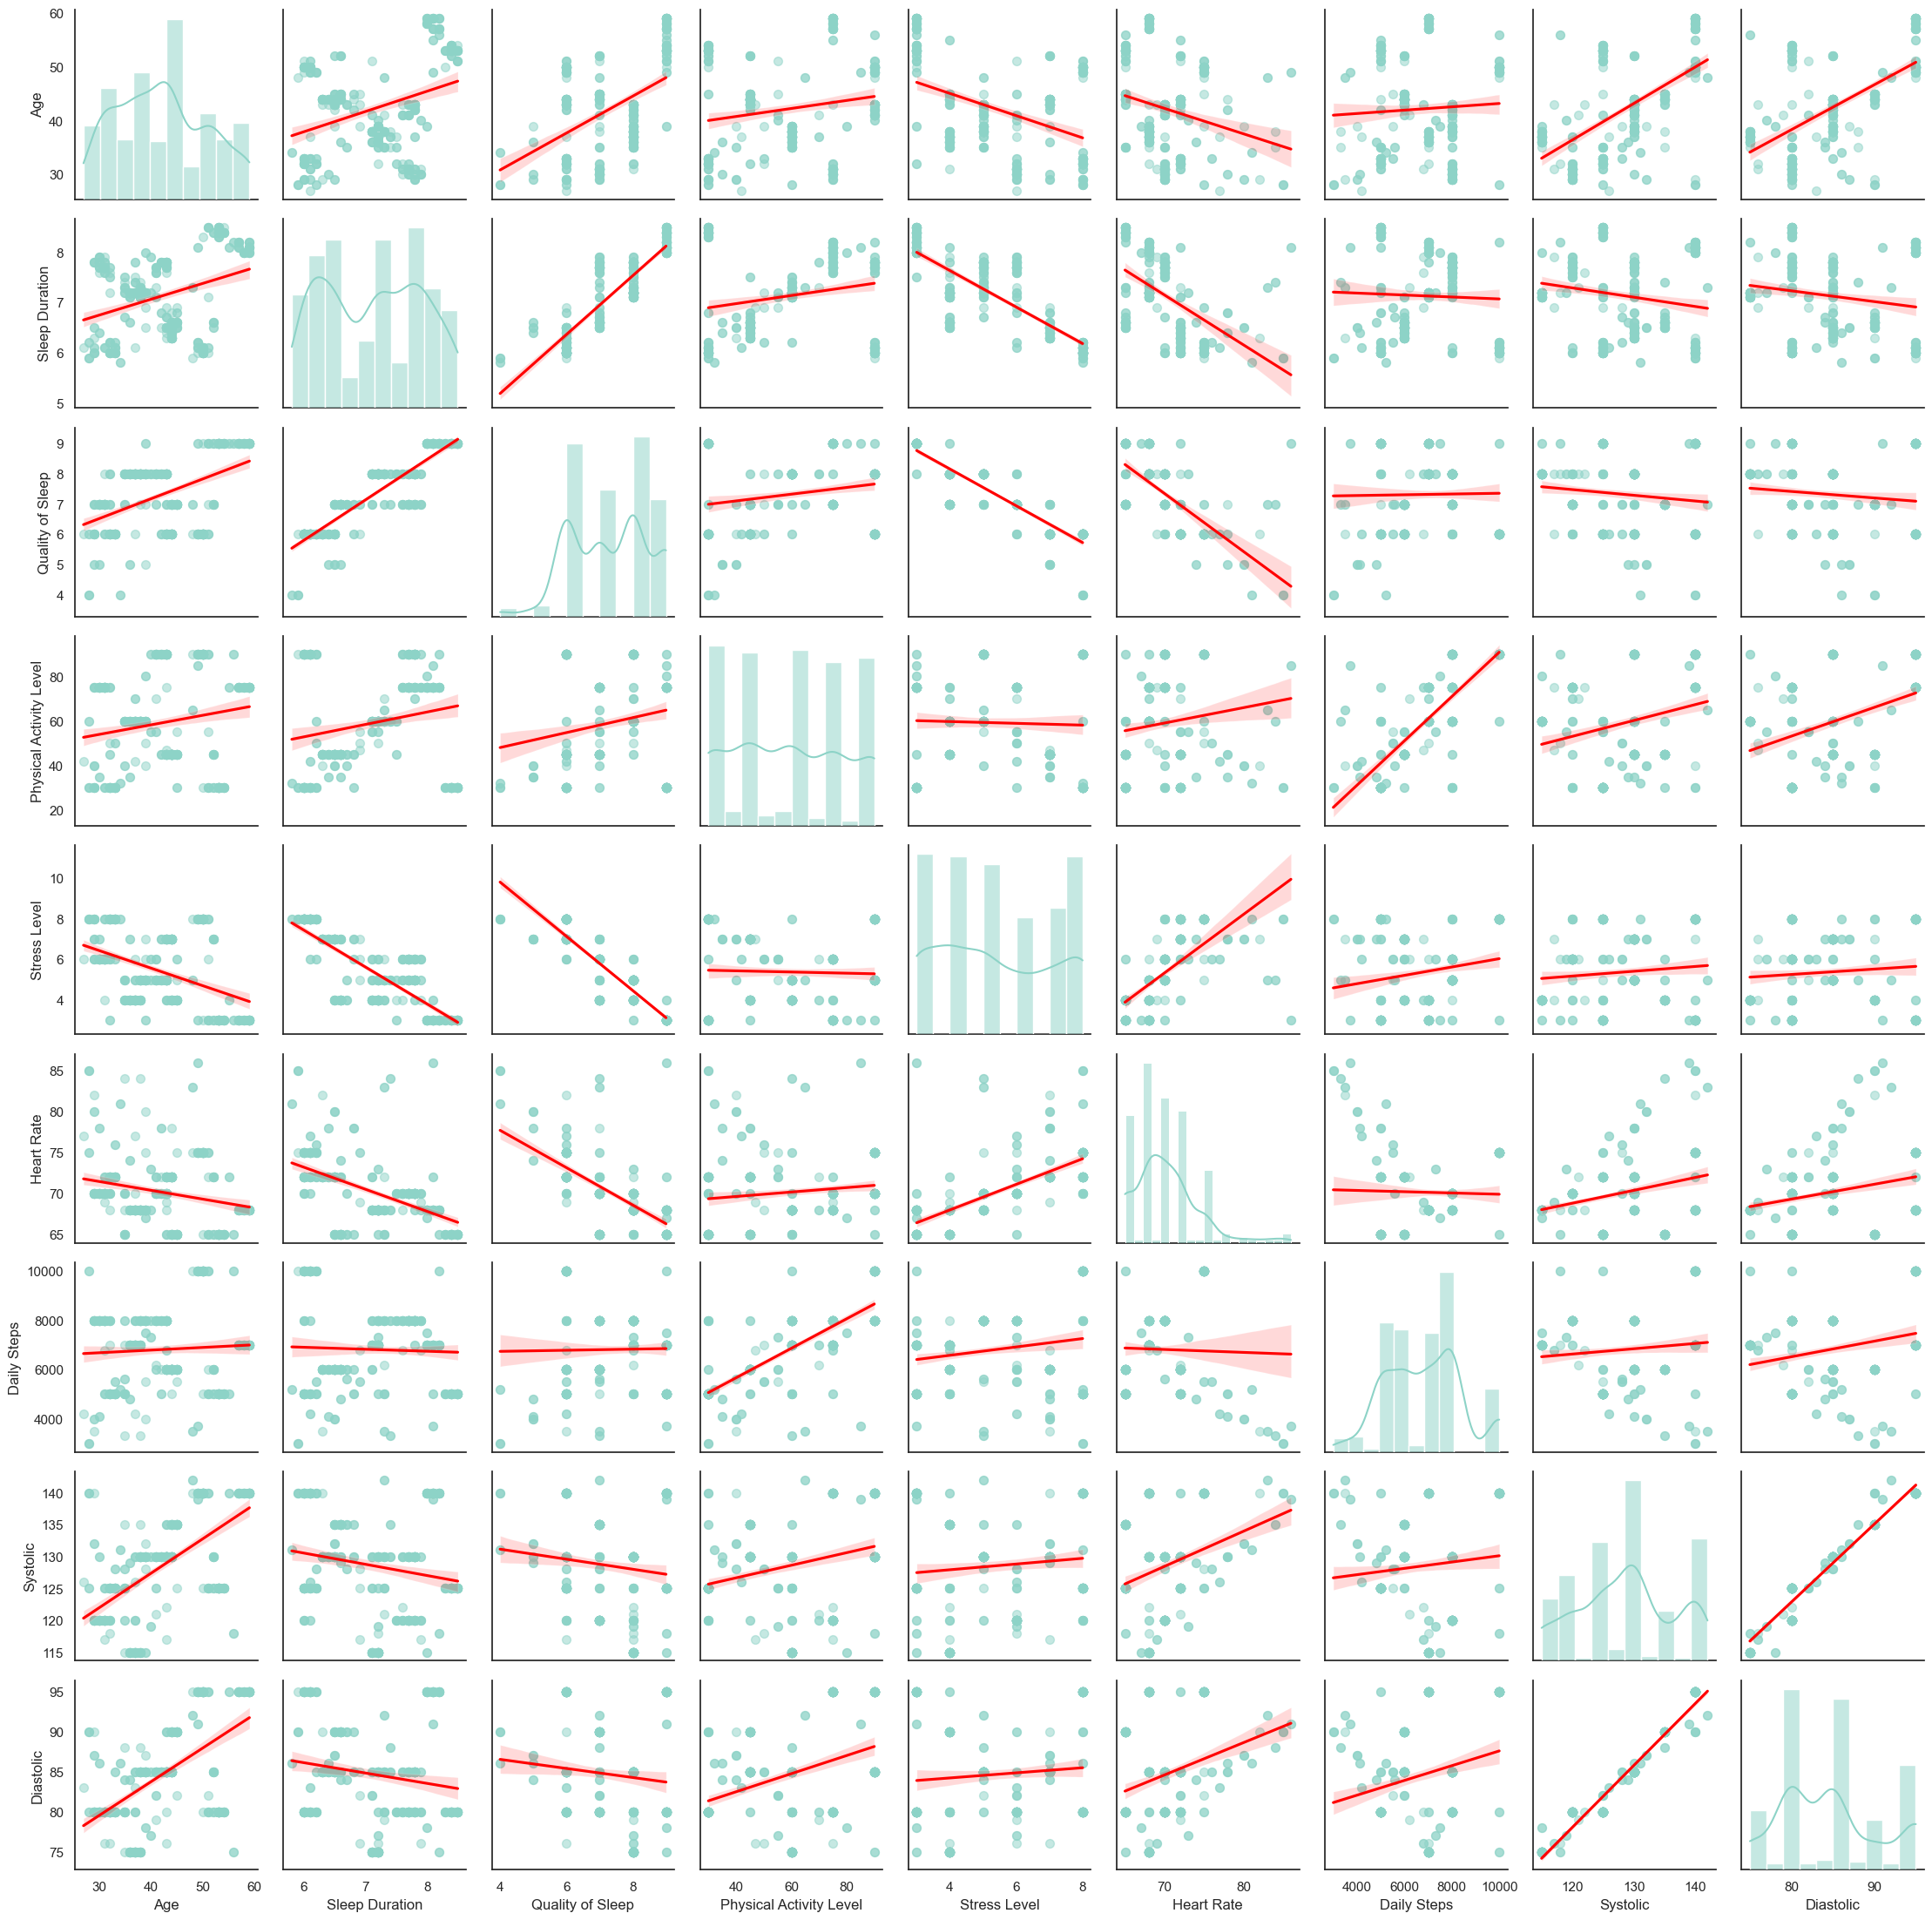

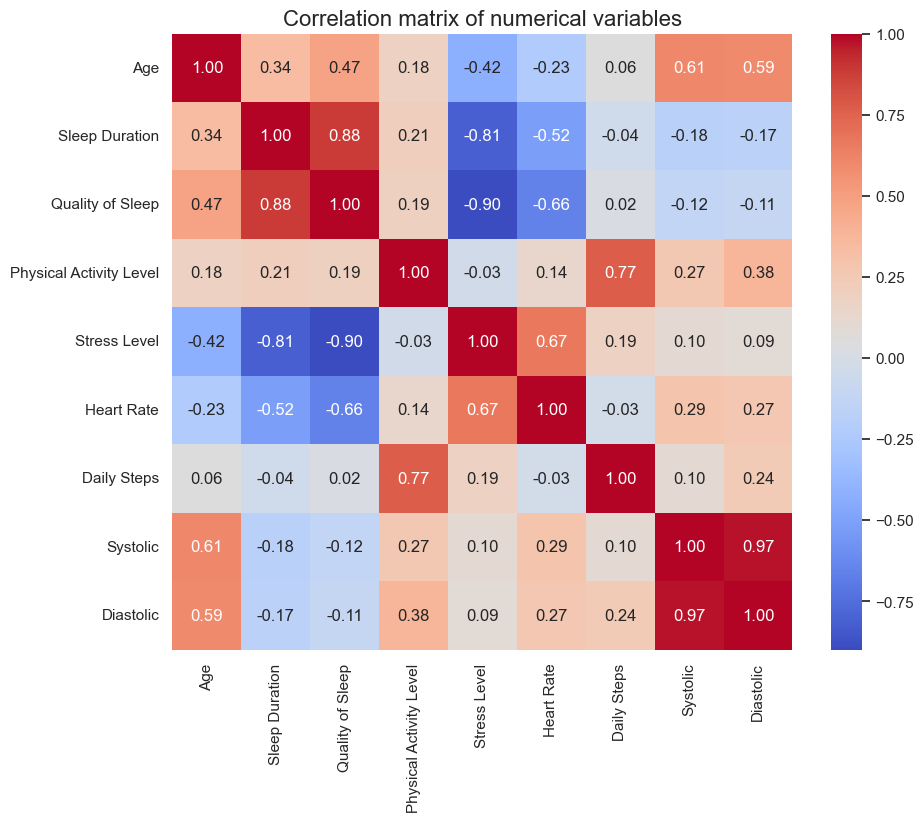

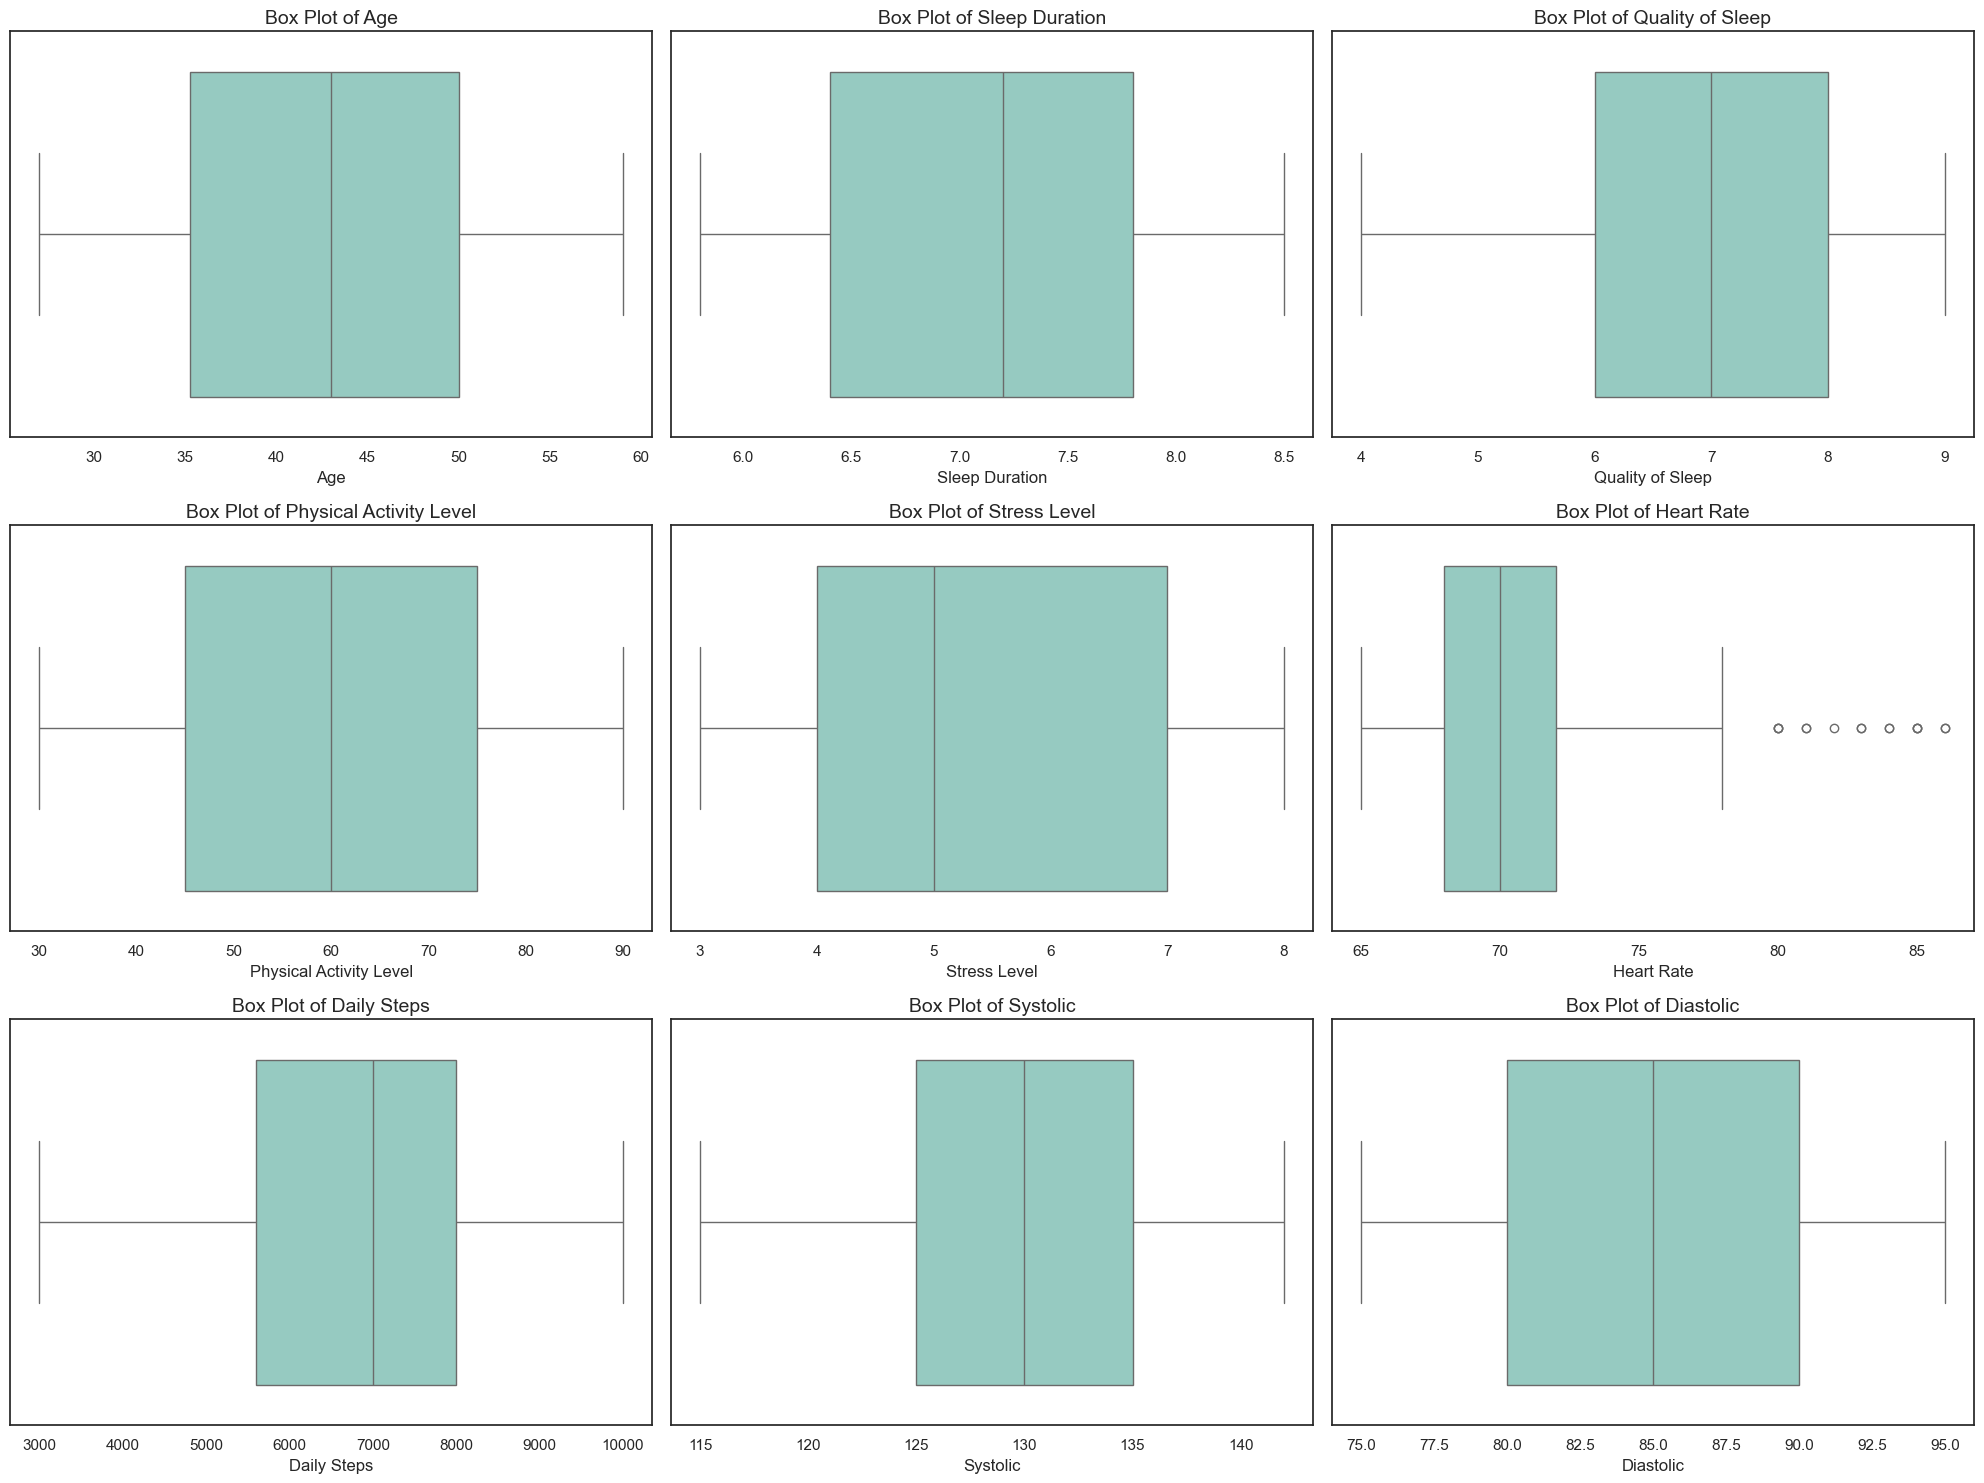

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")
sns.set_palette(palette='Set3')

# List of key numerical variables
num_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# PairGrid instance, mapping a histogram+KDE to the diagonal and regplot to the off-diagonal elements to show the bivariate distributions with a regression line
pair_grid = sns.PairGrid(data=data[num_vars], diag_sharey=False)

pair_grid.map_diag(sns.histplot, kde=True)

pair_grid.map_offdiag(sns.regplot, scatter_kws={'s':50, 'alpha':0.5}, line_kws={'color':'red'})

# Correlation matrix
corr_matrix = data[num_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation matrix of numerical variables', fontsize=16)
plt.show()

# Box plots to identify any outliers
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 15))

for i, var in enumerate(num_vars):
    row = i // 3
    col = i % 3
    sns.boxplot(x=data[var], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {var}', fontsize=14)
    axes[row, col].set_xlabel(var, fontsize=12)
    
plt.tight_layout()
plt.show()

## 2.1 Numerical variables

The visualizations provide multiple insights into the dataset:

### Histograms:

- The distribution of `Age` seems to be slightly right-skewed, suggesting that there are more individuals in the younger age range than in the older range. 
- The `Quality of Sleep` is left-skewed meaning there are more individuals in our data with better quality of sleep. 
- The `Heart Rate` seems to have a relatively normal distribution being skewed towards the right end suggesting there are more individuals with lower heart rates.
- Looking at the other numerical variables we can see that we do not have a pattern in most variables with half of them showing a balance in the data.


### Correlation:

From the scatter plots interpreted along with heat map  we can extract the following insights about the relationship between variables:*

- `Sleep Duration` has a strong positive linear relationship with `Quality of Sleep` backed up by correlation 0.88, suggesting that as the sleep duration increases, the quality of sleep tends to improve. `Sleep Duration` has a clear negative linear relationships with `Stress Level` (-0.81) and `Heart Rate` (-0.52), the latter being less correlated whih might be influensed by outliers, further analysis is required.
- `Quality of Sleep` seems to have strong negative linear relationships with `Stress Level` (-0.90) and `Heart Rate` (-0.66) suggesting that individuals with high stress and high heart rates tend to rate lower their quality of sleep.
- `Stress Level` seems to have relatively strong positive linear relationship with `Heart Rate` (0.67), implying that higher stress levels are associated with higher heart rates.
- There is a also positive linear trend between `Age` and `Quality of Sleep` with correlation 0.47 suggesting that older individuals tend to have better quality of sleep.
- The positive linear relationships can be seen between `Age` and both `Systolic` and `Diastolic` variables with correlations 0.61 and 0.59 respectively.
- `Systolic` and `Diastolic` are also strongly correlated (0.91).

### Outliers:

The box plots reveal outliers in `Heart Rate`, however, these "outliers" may be natural extremes and not errors, as they're within conceivable ranges for individuals.

['No Disorder' 'Sleep Apnea' 'Insomnia']


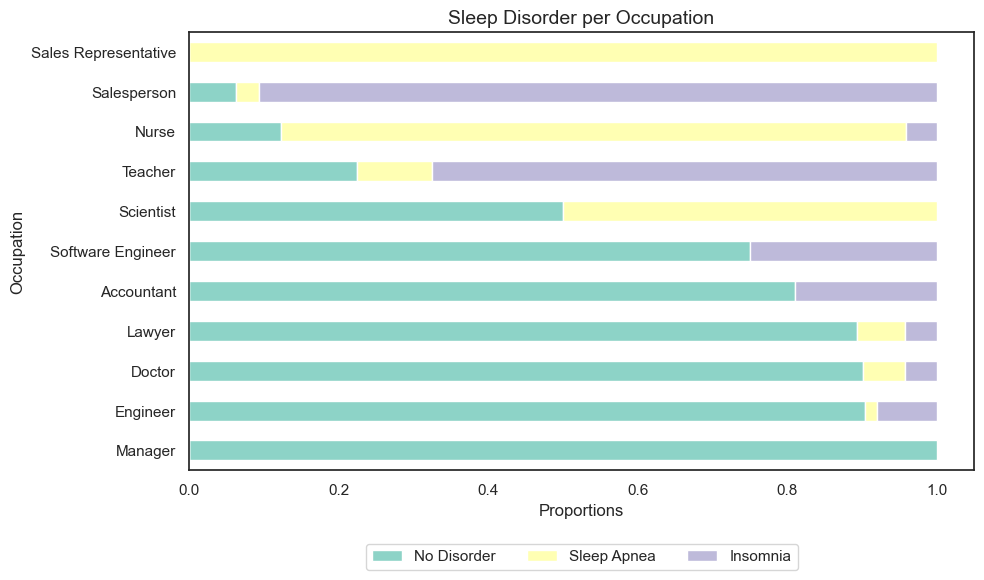

In [11]:
# # Distribution of categorical variables
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

# for i, var in enumerate(['Gender', 'BMI Category', 'Sleep Disorder']):
#     col = i
#     order = data[var].value_counts().index
#     sns.countplot(x=var, data=data, ax=axes[col], order=order)    
#     axes[col].set_title(f'Distribution of {var}', fontsize=14)
#     axes[col].set_xlabel(var, fontsize=12)
#     axes[col].set_ylabel('Count', fontsize=12)
#     axes[col].set_xticklabels(axes[col].get_xticklabels(), rotation=45)
# plt.tight_layout()
# plt.show()


# # Distribution of Sleep Disorder per Occupation variable 
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# order = data['Occupation'].value_counts().index
# sns.countplot(x='Occupation', data=data, ax=ax1, order=order)
# ax1.set_title('Distribution of Occupations', fontsize=14)
# ax1.set_xlabel('Occupation', fontsize=12)
# ax1.set_ylabel('Count', fontsize=12)
# ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


# # Distribution of categorical variables
# occup_dis = data.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True).unstack().sort_values(by='None', ascending=False)
# order_sleep_disorder = ['None', 'Sleep Apnea', 'Insomnia']

# occup_dis[order_sleep_disorder].plot(kind='barh',stacked=True, ax=ax2)
# ax2.set_title('Sleep Disorder per Occupation', fontsize=14)
# ax2.set_xlabel('Proportions', fontsize=12)
# ax2.set_ylabel('Occupation', fontsize=12)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(10, 5)) 
# sns.boxplot(data=data,y='Sleep Duration', x='Occupation')
# plt.xticks(rotation=90)
# plt.show()

# Replace NaN values with 'No Disorder'
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('No Disorder')

# Verify unique values after filling NaN
print(data['Sleep Disorder'].unique())

# Group by Occupation and calculate proportions
occup_dis = data.groupby('Occupation')['Sleep Disorder'].value_counts(normalize=True).unstack()

# Ensure all categories are present, filling missing ones with 0
order_sleep_disorder = ['No Disorder', 'Sleep Apnea', 'Insomnia']
occup_dis = occup_dis.reindex(columns=order_sleep_disorder, fill_value=0)

# Sort by 'No Disorder' column
occup_dis = occup_dis.sort_values(by='No Disorder', ascending=False)

# Plot the data
fig, ax2 = plt.subplots(figsize=(10, 6))
occup_dis.plot(kind='barh', stacked=True, ax=ax2)
ax2.set_title('Sleep Disorder per Occupation', fontsize=14)
ax2.set_xlabel('Proportions', fontsize=12)
ax2.set_ylabel('Occupation', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.tight_layout()
plt.show()




## 2.2 Categorical variables

There are more instances of 'None' in the `Sleep Disorder` category, meaning we are dealing with imbalanced target variable in our classification problem, which later we will adress by applying the algorithms with Class Weights.
The `Gender` distribution seems fairly balanced.
The `Occupation` distribution is varied.

Key Insights:
- Dominance of 'None' Category in `Sleep Disorders`: For almost all occupations, a majority don't suffer from sleep disorders, as indicated by the prevalence of the 'None' category.
- Nurses at Risk: A significant portion of nurses seem to be suffering from 'Sleep Apnea' compared to other occupations. This could suggest unique stressors or lifestyle factors that predispose them to this disorder.
- Teachers' and Salespersons' Insomnia:the incidence 'Insomnia' for both these occupations is higher compared to most other occupations.
- Occupational Rarity vs. Sleep Disorder: While 'Sales Representative' is one of the least common occupations in the dataset, it has a relatively higher proportion of sleep disorders compared to its population.


Given these insights, the next steps involve encoding categorical variables and standardizing the data. After these preprocessing steps, we can proceed with feature engineering and model building.

Let's start with data preprocessing.

# 3. Data Preprocessing

As the data was alredy cleaned, the only step left is Encoding Categorical Variables. The categorical variables (`Gender`, `Occupation`, `BMI Category`, and `Sleep Disorder`) have to be encoded into numerical formats. This transformation is essential for machine learning algorithms, which require numerical input.

In [14]:
#installing required libraries
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

X = data.drop(['Sleep Disorder'], axis=1) 
y = data['Sleep Disorder']

# Label encoding for categorical variables in X
label_encoders = {}  # To store the encoder objects for potential inverse transformations later

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Encoding the target variable
le_target = LabelEncoder()
y = le_target.fit_transform(y)

X.head(), y[:5]

(   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
 0       1   27           9             6.1                 6   
 1       1   28           1             6.2                 6   
 2       1   28           1             6.2                 6   
 3       1   28           6             5.9                 4   
 4       1   28           6             5.9                 4   
 
    Physical Activity Level  Stress Level  BMI Category  Heart Rate  \
 0                       42             6             2          77   
 1                       60             8             0          75   
 2                       60             8             0          75   
 3                       30             8             1          85   
 4                       30             8             1          85   
 
    Daily Steps  Systolic  Diastolic  
 0         4200       126         83  
 1        10000       125         80  
 2        10000       125         80  
 3         3000       14

# 4. Model building

Now, we're ready to move on to the model building phase. Here's the plan:

## 4.1 Model Selection

1. Given the nature of the data - it's multicollinearity and imbalance, we will start with `Logistic Regression` as a baseline model, as this algorithm supports the use of class weights. We'll set class weights to be "balanced", which will automatically adjust weights inversely proportional to class frequencies in the input data. In combination with the _class_weight_ parameter, we will set _stratify_ parameter in train_test_split to y to ensure that the minority class is adequately represented in both sets.

2. To address **multicollinearity** concern, we will fit our data to Regularized Linear Model such as **Logistic Regression with L2 regularization** (`Ridge`) which can constrain the magnitude of coefficients. This prevents any one feature from having too much influence on the model due to multicollinearity. 

3. We will also try fitting `SVM` as it can be effective in the presence of multicollinearity. 

4. Next, we will fit our data to `Random Forests Classifier` as this ensemble model naturally handles multicollinearity well. Each decision tree in the forest considers a subset of features, reducing the impact of multicollinear features. The ensemble approach of random forest also ensures that the model is robust to individual feature relationships. It also provides an indication of feature importance, which can be insightful.

As Regularized Linear Models tend to show better results when fitted the standardised data, we will apply `StandardScaler()` to numerical features. But first, we split our dta to train and test to avoid data leakage.

In [16]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

#Applying StandardScaler to Numerical Variables
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test_scaled[num_vars] = scaler.transform(X_test[num_vars])

## 4.2 Model Training

We will train the model on the training data with `cross-validation`. As cross-validation provides an estimate of the model's performance based on multiple splits of the training data, which is more robust because it reduces the risk that the model is only tuned to a specific portion of the data. 

In [18]:
#Creating function to train and validate models
def train_and_cross_validate(model, X_train, y_train, cv=5):
    """
    Function to train the models using cross-validation and return the average score.
    """
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_weighted')
    print(f"{model.__class__.__name__} Cross-Validation F1_weighted: {np.mean(scores):.2f} +/- {np.std(scores):.2f}")
    model.fit(X_train, y_train)  
    return model

## 4.3 Model Evaluation

Given the class imbalance in the dataset, accuracy might not be the best metric to evaluate the performance of the models. Instead, we'll focus on metrics that provide more insights into the models' performances across different classes, such as: 
- `Precision`
- `Recall`
- `F1-score`
- `Confusion Matrix`

When cross-validating the performance of our models on training data, we will set the scoring parameter to 'f1_weighted' as we want to weight the F1 score by the support of each class.
We'll use the classification_report from sklearn to get precision, recall, and F1-score for each class when testing our data on the test set. Additionally, we'll compute and visualize the confusion matrix for a comprehensive evaluation.

LogisticRegression Cross-Validation F1_weighted: 0.88 +/- 0.02
LogisticRegression Classification Report:
              precision    recall  f1-score   support

        None       0.79      0.83      0.81        23
 Sleep Apnea       0.98      0.92      0.95        66
    Insomnia       0.81      0.92      0.86        24

    accuracy                           0.90       113
   macro avg       0.86      0.89      0.87       113
weighted avg       0.91      0.90      0.90       113



RidgeClassifier Cross-Validation F1_weighted: 0.86 +/- 0.03
RidgeClassifier Classification Report:
              precision    recall  f1-score   support

        None       0.79      0.83      0.81        23
 Sleep Apnea       0.98      0.92      0.95        66
    Insomnia       0.81      0.92      0.86        24

    accuracy                           0.90       113
   macro avg       0.86      0.89      0.87       113
weighted avg       0.91      0.90      0.90       113



SVC Cross-Validation F1_weight

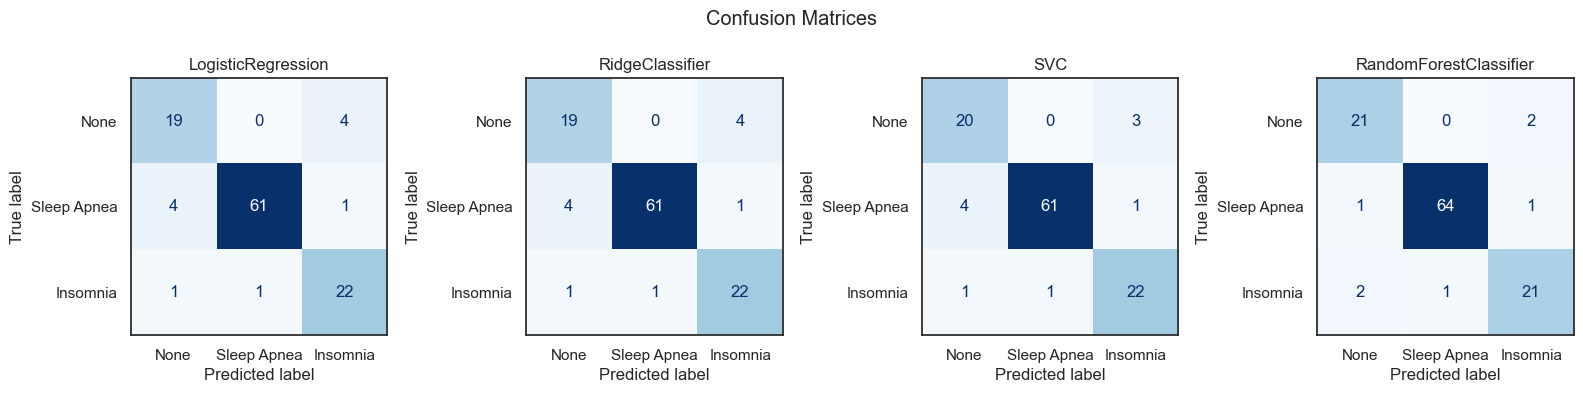

In [20]:
#Creating function to evaluate and plot models   
def evaluate_and_plot_confusion_matrix(model, X_train, y_train, X_test, y_test, class_names, ax):
    """
    Evaluate the model and plot the confusion matrix.
    """
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    print("\n" + "="*80 + "\n")
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    disp.im_.colorbar.remove()
    ax.set_title(f"{model.__class__.__name__}")
    fig.suptitle('Confusion Matrices')

# Defining class names for confusion matrix display
class_names = ['None', 'Sleep Apnea', 'Insomnia']

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, class_weight='balanced'),
    "Ridge Classifier": RidgeClassifier(class_weight='balanced'),
    "SVM": SVC(class_weight='balanced', kernel='linear'),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

# Iterate over models, cross-validate, train, predict, and generate classification report and confusion matrix
for i, (name, model) in enumerate(models.items()):
    X_train_set, X_test_set = (X_train_scaled, X_test_scaled) if name in ["Logistic Regression", "Ridge Classifier", "SVM"] else (X_train, X_test)
    
    trained_model = train_and_cross_validate(model, X_train_set, y_train)
    evaluate_and_plot_confusion_matrix(trained_model, X_test_set, y_test, X_test_set, y_test, class_names, axes[i])

plt.tight_layout()
plt.show()


_**Cross-validation scores:**_

`Logistic Regression`:
- **Best performing model** with an F1-score of `88%`.
- Consistent performance across different data subsets, indicated by a low standard deviation `2%`.

`Ridge Classifier`:
- Slightly lower F1-score than Logistic Regression at 86%.
- Higher variability in performance (standard deviation of 3%), which may suggest sensitivity to data variations.

`Support Vector Classifier (SVC)`:
- Competitive F1-score of 87%, close to Logistic Regression.
- Moderate variability with a standard deviation of 3%, indicating relatively stable performance.

`Random Forest Classifier`:
- Least F1-score with 84% accuracy, which could signal potential underfitting or a need for parameter optimization.
- Highest variability in results (standard deviation of 6%), implying the model's performance is less reliable across different training sets.

Overall, the Logistic Regression model is the most reliable and accurate for the given dataset. SVC also shows promise with similar F1-score but slightly more variability. Ridge and Random Forest classifiers might require more fine-tuning to improve stability and performance. These insights would guide further model development, parameter tuning, and evaluation on additional metrics beyond accuracy.

_**Classification report:**_

However, comparing the classification reports of the models, the `Random Forest Classifier` showed the best performance achieving a F1-score of `94%` on the test set, which is a strong initial result. Here are more detailed metrics:

Classes 0 and 2 have comparable precision, recall, and F1-scores around 0.88-0.91, indicating balanced performance. Class 1 stands out with higher metrics, nearing 0.98, suggesting it's better differentiated from others. The overall accuracy of 0.94 is high, and the macro and weighted averages also align closely with this value. The 'support' row reveals the sample count for each class, showing class 1 has the highest representation. 

Given that the RandomForestClassifier shows a high F1-score of 0.94 on the test set, yet a lower average F1-score in cross-validation, it may be overfitting to the training data, performing exceptionally well on one particular split (the test set) but less consistently across multiple folds in cross-validation.


_**Confusion matrix:**_

These plots show where our models got things right and where they made mistakes when guessing about people's sleep disorders. `Random Forest Classifier` seems to do a pretty good job, especially with 'Sleep Apnea' and 'None', while there is an area where it could improve when it comes to 'Insomnia' considering that other models tend to predict slightly better this category.


## 4.4 Fine-tunning

Different performance of models on training and test data suggests caution and indicates that further model validation or tuning might be necessary. This is why we will go with hyperparameter tuning, becasue a model that was slightly underperforming can end up outperforming the best initial model. So, we will try fine-tuning our models. The `GridSearchCV` method will be used for each model, the steps will be performed as follows:

- Defining hyperparameter grids for each model.
- Performing grid search with cross-validation.
- Extracting the best model and its parameters.
- Final model training and evaluation on Test Set.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
LogisticRegression Classification Report:
              precision    recall  f1-score   support

        None       0.79      0.83      0.81        23
 Sleep Apnea       0.98      0.92      0.95        66
    Insomnia       0.81      0.92      0.86        24

    accuracy                           0.90       113
   macro avg       0.86      0.89      0.87       113
weighted avg       0.91      0.90      0.90       113



Best Parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}


Fitting 5 folds for each of 3 candidates, totalling 15 fits
RidgeClassifier Classification Report:
              precision    recall  f1-score   support

        None       0.79      0.83      0.81        23
 Sleep Apnea       0.98      0.92      0.95        66
    Insomnia       0.81      0.92      0.86        24

    accuracy                           0.90       113
   macro avg       0.86      0.89      0.87       113
weighted avg      

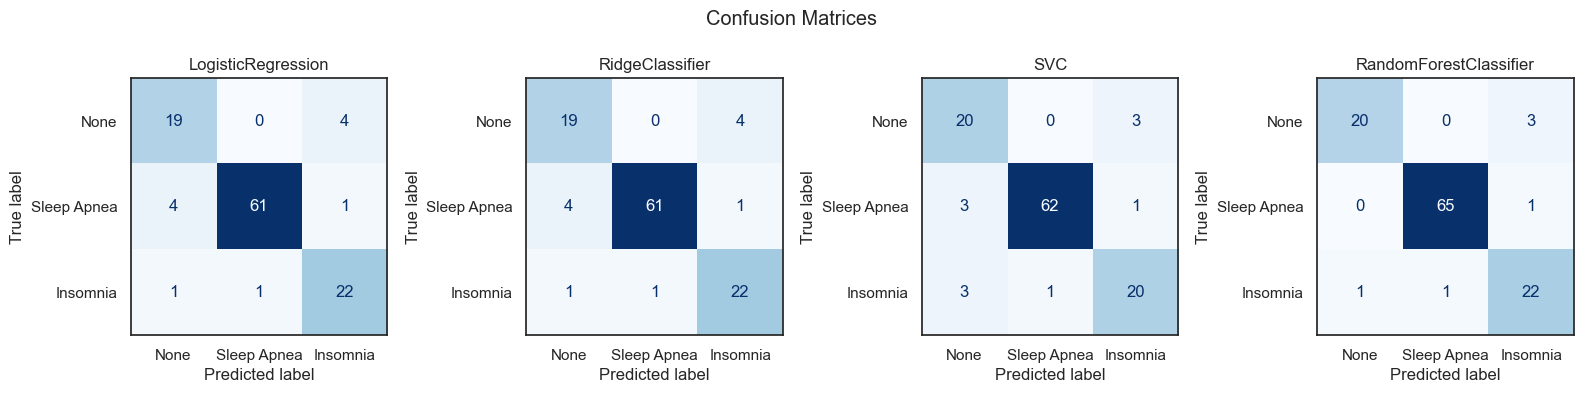

In [23]:
#Creating a function to perform grid search on models
def perform_grid_search(model, params, X_train, y_train):
    """
    Perform grid search for hyperparameter tuning.
    """
    grid_search = GridSearchCV(model, params, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_, grid_search.best_params_

# Model parameters and configurations

param_grids = {
    "Logistic Regression": {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'saga']},
    "Ridge Classifier": {'alpha': [0.1, 1.0, 10.0]},
    "SVM": {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2'],  # Replaced 'auto' with valid options
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }
}



fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))
axes = axes.flatten()

# Model training, hyperparameter tuning, evaluation, and plotting
for i, (name, model) in enumerate(models.items()):

    X_train_set, X_test_set = (X_train_scaled, X_test_scaled) if name in ["Logistic Regression", "Ridge Classifier", "SVM"] else (X_train, X_test)
    best_model, best_params = perform_grid_search(model, param_grids[name], X_train_set, y_train)
    evaluate_and_plot_confusion_matrix(best_model, X_test_set, y_test, X_test_set, y_test, class_names, axes[i])
    print(f"Best Parameters for {name}: {best_params}")
    print("\n" + "="*80 + "\n")

plt.tight_layout()
plt.show()


In general, cross-validation during hyperparameter tuning is used to ensure that the selection of hyperparameters is not overfitted to a particular subset of the training data, so the final test on unseen data is considered sufficient for evaluating the model's expected performance without performin additional cross-validating. 

From the classification report after hyperparameters tuning it's clear that `Random Forest Classifier` showed the best performance with a F1-score of 95% on the test set.
Confusion Matrix: The model is capable of almost perfectly identifying 'Sleep Apnea', now it's also better at indentifying 'Insomia' but worse at distinguishing 'None' class. Given these results, the model performs certainly performs better compared to other models. 

Additionally, analyzing feature importance can provide insights into which variables are most influential in predicting sleep disorders. Let's examine the feature importance next.

## 4.5 Feature Importance

We will analyze the most important features according to the model.

In [26]:
# #Training RandomForestClassifier to extract feature importance

# rf = RandomForestClassifier(class_weight='balanced', random_state=42,bootstrap= True, max_depth= None, max_features='auto', min_samples_leaf=1, min_samples_split=10, n_estimators= 50).fit(X_train, y_train)

# feature_importances = rf.feature_importances_

# features_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importances
# })

# features_df.sort_values(by='Importance', ascending=False).plot(x='Feature',y='Importance',kind='bar')
# plt.ylabel('Importance')
# plt.title('Feature Importance')
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    bootstrap=True,
    max_depth=None,
    max_features='sqrt',  # Replacing 'auto' with 'sqrt'
    min_samples_leaf=1,
    min_samples_split=10,
    n_estimators=50
).fit(X_train, y_train)

feature_importances = rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

print(features_df.sort_values(by='Importance', ascending=False))


                    Feature  Importance
10                 Systolic    0.193805
11                Diastolic    0.145660
7              BMI Category    0.121801
2                Occupation    0.121167
1                       Age    0.105710
5   Physical Activity Level    0.085788
9               Daily Steps    0.072209
3            Sleep Duration    0.067620
8                Heart Rate    0.043241
4          Quality of Sleep    0.022886
6              Stress Level    0.010446
0                    Gender    0.009666


The feature importances provided by the Random Forest model indicates that the most influential feature in predicting sleep disorder is `Systolic` with importance approximately 19%, followed by `Diastolic` blood pressure (15%), `BMI category` (12%), `Occupation` (12%) and so on.

# Executive Summary

- The `Logistic Regression` model displayed the highest average F1-score (88%) with minimal variability (±2%), indicating a strong and consistent predictive capability across various data subsets.
- The `Random Forest Classifier`, while having a lower average F1-score (84%) in cross-validation, demonstrated a superior F1-score of 95% on the test set after hyperparameter tuning.
- The `Support Vector Classifier (SVC)` and `Ridge Classifier` showed competitive performance, but with slightly higher variability in results.
- Confusion matrix analysis revealed that the Random Forest Classifier is particularly adept at identifying 'Sleep Apnea' and has shown improvement in identifying 'Insomnia' after hyperparameter tuning.
- Feature importance analysis indicated that `'Systolic'` blood pressure is the most significant predictor, followed by `'Diastolic'` blood pressure and `'BMI Category'`.

# Recommendations

- Adopt Logistic Regression as the primary model for setting health insurance premiums due to its stable and high F1-score, ensuring that premiums are based on reliable predictions.
- Further explore and fine-tune Random Forest given its high performance on the test set, especially to reduce overfitting as indicated by the variability in cross-validation scores.
- Consider systolic blood pressure as a key factor in premium calculation, as it is the most influential feature in predicting sleep disorders.
- Incorporate model insights into health assessments, using identified key features like blood pressure and BMI to guide risk evaluation and premium setting.
- Implement regular re-evaluation of the models with new data to maintain and improve predictive accuracy and reliability.
- By leveraging these insights and recommendations, the health insurance company can more accurately assess the risk of sleep disorders among potential clients, leading to fairer and more precise insurance premium settings.